In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
top = Table.read_table('top_movies.csv')
top.set_format([2, 3], NumberFormatter).show(3)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997


## Uniform random sample

In [3]:
top.sample(50).sort('Gross', descending=True).show()

Title,Studio,Gross,Gross (Adjusted),Year
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,234,132,700",1982
The Lion King,Buena Vista (Disney),"422,783,777","775,573,900",1994
Spider-Man,Sony,"403,706,375","604,517,300",2002
Finding Nemo,Buena Vista (Disney),"380,843,261","535,802,700",2003
The Passion of the Christ,NM,"370,782,930","519,432,100",2004
Inside Out,Buena Vista (Disney),"356,461,711","375,723,400",2015


In [4]:
top.sample(50, with_replacement=True).sort('Gross', descending=True).show()

Title,Studio,Gross,Gross (Adjusted),Year
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Hunger Games,Lionsgate,"408,010,692","442,510,400",2012
Inside Out,Buena Vista (Disney),"356,461,711","375,723,400",2015
Transformers: Dark of the Moon,Paramount/Dreamworks,"352,390,543","385,069,700",2011
Spider-Man 3,Sony,"336,530,303","425,554,300",2007
Minions,Universal,"336,045,770","354,213,900",2015
Alice in Wonderland (2010),Buena Vista (Disney),"334,191,110","365,718,600",2010
Indiana Jones and the Kingdom of the Crystal Skull,Paramount,"317,101,119","384,231,200",2008
The Lord of the Rings: The Fellowship of the Ring,New Line,"315,544,750","476,753,700",2001


## Dice

In [5]:
die = Table().with_column('Face', [1, 2, 3, 4, 5, 6])
die

Face
1
2
3
4
5
6


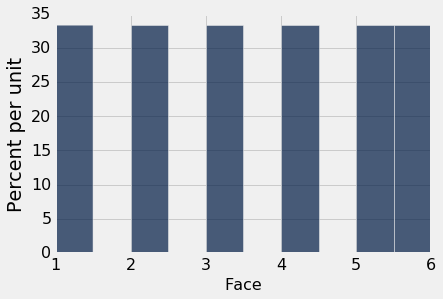

In [6]:
die.hist()

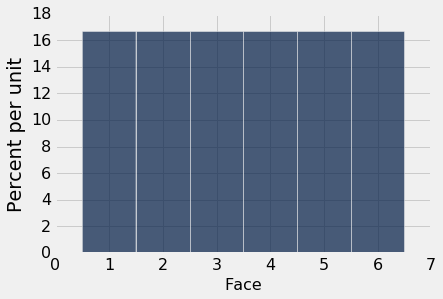

In [7]:
dice_bins = np.arange(0.5, 7, 1)
die.hist(bins=dice_bins)

In [8]:
die.sample(10, with_replacement=True)

Face
4
6
2
2
2
1
4
6
6
5


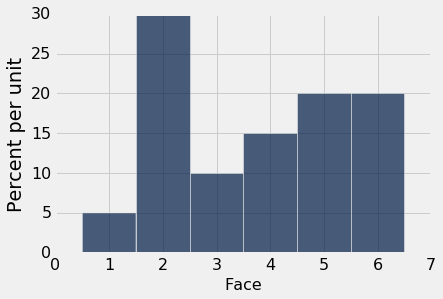

In [9]:
def dice_hist(n):
    rolls = die.sample(n, with_replacement=True)
    rolls.hist(bins=dice_bins)
    
dice_hist(20)

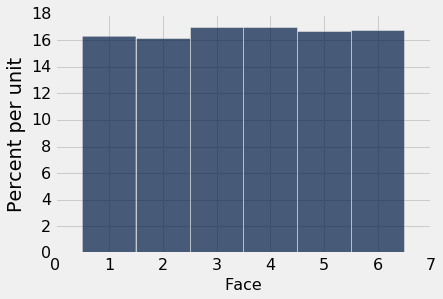

In [10]:
dice_hist(10000)

## Law of Averages

In [11]:
trips = Table.read_table('trip.csv')
commute = trips.where(trips.column('Duration') < 1800)
commute.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


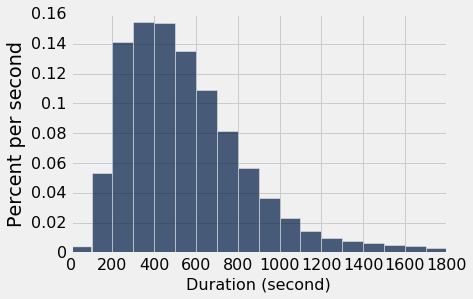

In [12]:
commute.hist('Duration', unit='second', bins=np.arange(0, 1801, 100))

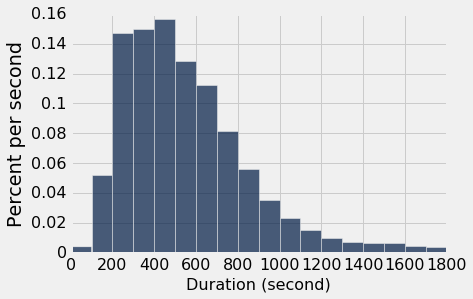

In [13]:
commute.sample(10000).hist('Duration', unit='second', bins=np.arange(0, 1801, 100))

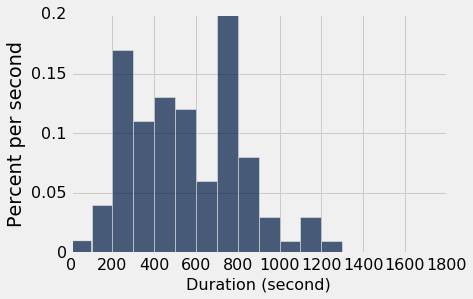

In [14]:
commute.sample(100).hist('Duration', unit='second', bins=np.arange(0, 1801, 100))

## Iteration

In [15]:
for i in np.arange(5):
    print(i)

0
1
2
3
4


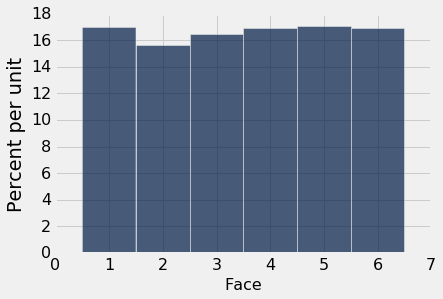

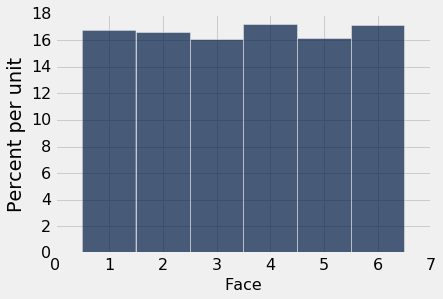

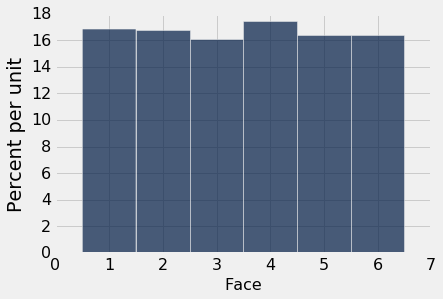

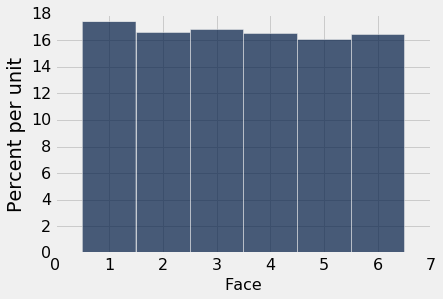

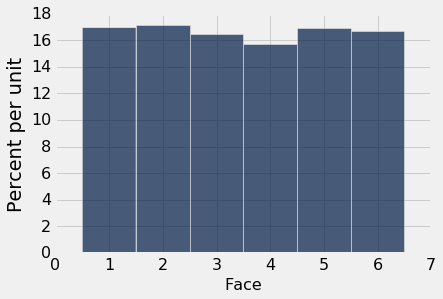

In [16]:
for i in np.arange(5):
    dice_hist(10000)

In [17]:
def roll_once(n):
    return np.random.randint(1, n+1)

In [18]:
roll_once(6)

2

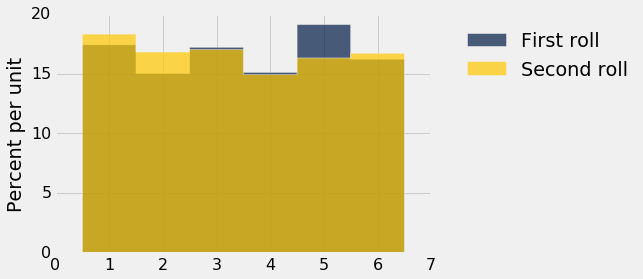

In [19]:
rolls = Table(['First roll', 'Second roll'])
for i in np.arange(1000):
    row = [roll_once(6), roll_once(6)]
    rolls.append(row)
rolls.hist(bins=dice_bins)

## Randomized response

In [20]:
def respond(true_answer):
    if roll_once(6) >= 5:
        return not true_answer
    else:
        return true_answer

In [21]:
respond(False)

False

In [22]:
responses = Table(['Truth', 'Response'])
for i in np.arange(1000):
    responses.append([False, respond(False)])

responses

Truth,Response
False,False
False,True
False,False
False,False
False,True
False,False
False,False
False,False
False,False
False,True


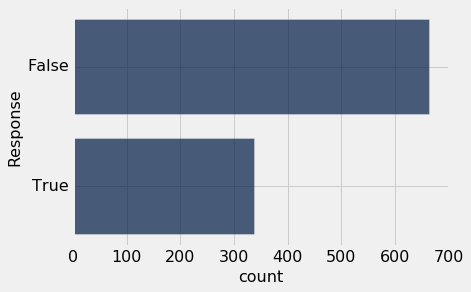

In [23]:
responses.group('Response').barh('Response')

## Randomized Response

In [24]:
long = commute.where(commute.column('Duration') > 600).num_rows
long

121090

In [25]:
p = long / commute.num_rows
p

0.35789125236815894

In [26]:
bikers = commute.sample(10000).select('Duration')
truths = bikers.with_column('Truth', bikers.column('Duration') > 600)
truths

Duration,Truth
287,False
546,False
679,True
484,False
1106,True
466,False
1462,True
388,False
220,False
272,False


In [27]:
responses = truths.with_column('Response', truths.apply(respond, 'Truth'))
responses

Duration,Truth,Response
287,False,False
546,False,True
679,True,False
484,False,True
1106,True,True
466,False,False
1462,True,True
388,False,False
220,False,False
272,False,False


In [28]:
3 * responses.where('Response', True).num_rows / 10000 - 1

0.37159999999999993